<a href="https://colab.research.google.com/github/BrunoASNascimento/ml_study/blob/master/introduction_ml_project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

dados = pd.read_csv(url)
dados.head(5)

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
x = dados[['home',	'how_it_works',	'contact',	'bought']]
y = dados['bought']

In [ ]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

In [ ]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
previsoes = modelo.predict(teste_x)
print(previsoes)
print(teste_y.values)

[0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
[0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

taxa_de_acertos = accuracy_score(teste_y,previsoes)
print(f'Taxa de acertos {round(taxa_de_acertos*100,2)}%')

Taxa de acertos 100.0%


In [ ]:
from sklearn.model_selection import train_test_split    
SEED = 20
treino_x,teste_x ,treino_y,teste_y =train_test_split(x,y, test_size=0.25, random_state=SEED)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acertos = accuracy_score(teste_y,previsoes)
print(f'Taxa de acertos {round(taxa_de_acertos*100,2)}%')

Taxa de acertos 100.0%


In [ ]:
print(treino_y.value_counts())

0    47
1    27
Name: bought, dtype: int64


In [ ]:
print(teste_y.value_counts())

0    19
1     6
Name: bought, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split    
SEED = 20
treino_x,teste_x ,treino_y,teste_y =train_test_split(x,y, test_size=0.25, random_state=SEED,stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acertos = accuracy_score(teste_y,previsoes)
print(f'Taxa de acertos {round(taxa_de_acertos*100,2)}%')

Taxa de acertos 100.0%


In [ ]:
print(treino_y.value_counts())
print(teste_y.value_counts())

0    49
1    25
Name: bought, dtype: int64
0    17
1     8
Name: bought, dtype: int64


#Segunda parte


In [ ]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(url)
dados.head(5)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
change = {
    0:1,
    1:0
}
dados['finished'] = dados['unfinished'].map(change)
dados.head(10)

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
5,1,33,173,0
6,1,64,1965,0
7,1,99,1993,0
8,1,45,278,0
9,0,96,12479,1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


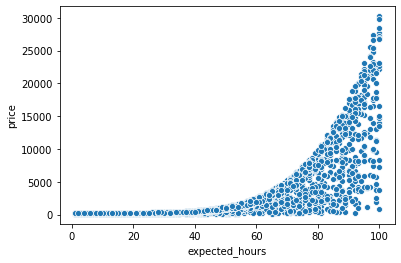

In [ ]:
import seaborn as sns

sns.scatterplot(x='expected_hours',y='price',data=dados)

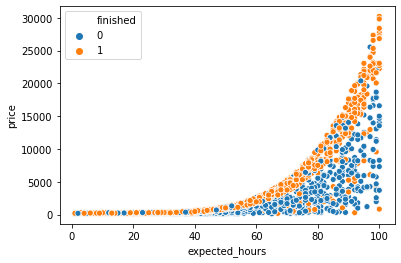

In [ ]:
sns.scatterplot(x='expected_hours',y='price',hue= 'finished',data=dados)

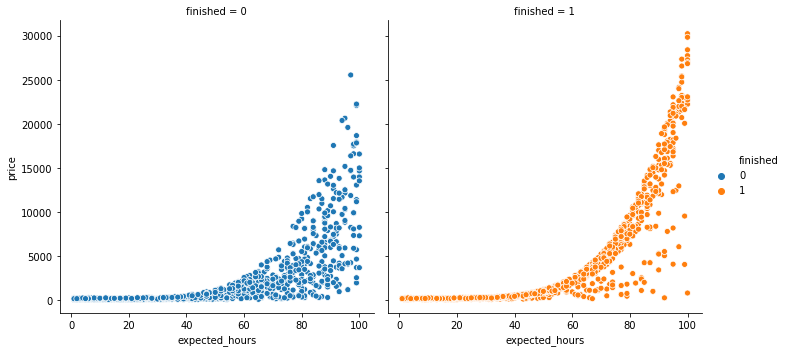

In [ ]:
sns.relplot(x='expected_hours',y='price',col= 'finished',hue= 'finished',data=dados)

In [ ]:
x = dados[['expected_hours','price']]
y = dados['finished']

In [ ]:
from sklearn.model_selection import train_test_split    
SEED = 5
np.random.seed(SEED)
treino_x,teste_x ,treino_y,teste_y =train_test_split(x,y, test_size=0.25, stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acertos = accuracy_score(teste_y,previsoes)
print(f'Taxa de acertos {round(taxa_de_acertos*100,2)}%')

Taxa de acertos 64.44%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import numpy as np

previsoes_de_base = np.ones(540)
taxa_de_acertos = accuracy_score(teste_y,previsoes_de_base)
print(f'Taxa de acertos baseline {round(taxa_de_acertos*100,2)}%')

Taxa de acertos baseline 52.59%


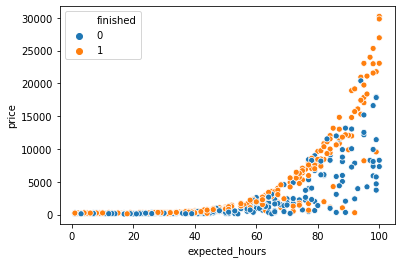

In [ ]:
sns.scatterplot(x='expected_hours',y='price',hue= teste_y,data=teste_x)

In [ ]:
x_min = teste_x['expected_hours'].min()
x_max = teste_x['expected_hours'].max()
y_min = teste_x['price'].min()
y_max = teste_x['price'].max()
print(x_min,
x_max,
y_min,
y_max)

1 100 100 30223


In [ ]:
pixels =100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [ ]:
xx , yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [ ]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

#Decision boundary


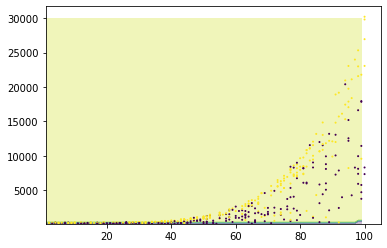

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(teste_x['expected_hours'],teste_x['price'],c=teste_y,s=1)



In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x,teste_x ,treino_y,teste_y =train_test_split(x,y, test_size=0.25, stratify=y)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acertos = accuracy_score(teste_y,previsoes)
print(f'Taxa de acertos {round(taxa_de_acertos*100,2)}%')

Taxa de acertos 55.19%


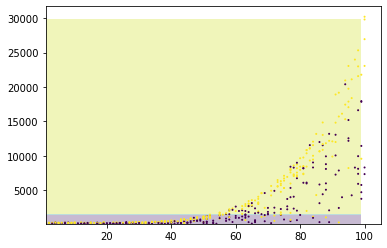

In [ ]:
x_min = teste_x['expected_hours'].min()
x_max = teste_x['expected_hours'].max()
y_min = teste_x['price'].min()
y_max = teste_x['price'].max()

pixels =100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx , yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(teste_x['expected_hours'],teste_x['price'],c=teste_y,s=1)

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)
raw_treino_x,raw_teste_x ,treino_y,teste_y =train_test_split(x,y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acertos = accuracy_score(teste_y,previsoes)
print(f'Taxa de acertos {round(taxa_de_acertos*100,2)}%')

Taxa de acertos 66.85%


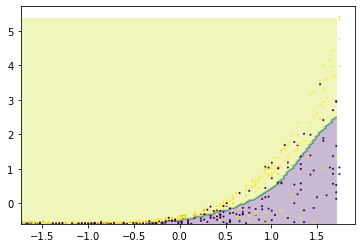

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels =100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx , yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(data_x,data_y,c=teste_y,s=1)

#Terceira parte

In [ ]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

dados = pd.read_csv(url)
dados.head(5)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
change = {
    'yes':1,
    'no':0
}
dados['sold'] = dados['sold'].map(change)
dados.head(10)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
5,5,14661,2007,55405.26,1
6,6,9990,2002,93415.61,1
7,7,11599,2008,65265.09,0
8,8,7834,1999,43917.53,1
9,9,14913,2003,107860.41,1


In [ ]:
from datetime import datetime
dados['age'] = datetime.today().year - dados['model_year']
dados['km_per_year'] = dados['mileage_per_year'] * 1.60934
dados = dados.drop(columns=['Unnamed: 0',	'mileage_per_year',	'model_year'])
dados.head(10)

,price,sold,age,km_per_year
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290
5,55405.26,1,13,23594.53374
6,93415.61,1,18,16077.30660
7,65265.09,0,12,18666.73466
8,43917.53,1,21,12607.56956
9,107860.41,1,17,24000.08742


In [ ]:
x = dados[['price'	,	'age',	'km_per_year']]
y = dados['sold']

In [ ]:
from sklearn.model_selection import train_test_split    
SEED = 5
np.random.seed(SEED)
treino_x,teste_x ,treino_y,teste_y =train_test_split(x,y, test_size=0.25, stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acertos = accuracy_score(teste_y,previsoes)
print(f'Taxa de acertos {round(taxa_de_acertos*100,2)}%')

Taxa de acertos 58.0%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.dummy import DummyClassifier
np.random.seed(SEED)
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x,treino_y)
taxa_de_acertos = dummy_stratified.score(teste_x,teste_y)
print(f'Taxa de acertos dummy stratified {round(taxa_de_acertos*100,2)}%')

Taxa de acertos dummy stratified 51.24%


In [ ]:
from sklearn.dummy import DummyClassifier
np.random.seed(SEED)
dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(treino_x,treino_y)
taxa_de_acertos = dummy_mostfrequent.score(teste_x,teste_y)
print(f'Taxa de acertos dummy most frequent {round(taxa_de_acertos*100,2)}%')

Taxa de acertos dummy most frequent 58.0%


In [ ]:
SEED = 5
np.random.seed(SEED)
raw_treino_x,raw_teste_x ,treino_y,teste_y =train_test_split(x,y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acertos = accuracy_score(teste_y,previsoes)
print(f'Taxa de acertos {round(taxa_de_acertos*100,2)}%')

Taxa de acertos 77.48%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

SEED = 5
np.random.seed(SEED)
treino_x,teste_x ,treino_y,teste_y =train_test_split(x,y, test_size=0.25, stratify=y)



modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acertos = accuracy_score(teste_y,previsoes)
print(f'Taxa de acertos {round(taxa_de_acertos*100,2)}%')

Taxa de acertos 79.28%


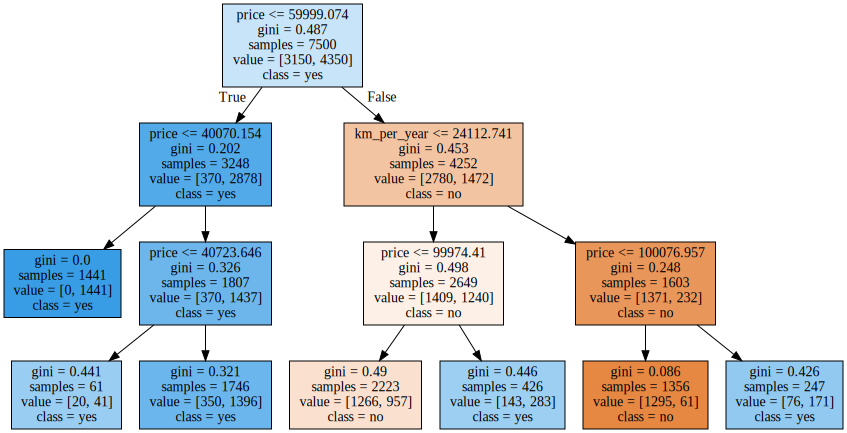

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo,out_file=None,feature_names=features,filled=True,class_names=['no','yes'])
graph = graphviz.Source(dot_data)
graph